In [2]:
# Importing packages
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Read in data
df = pd.read_csv("synthetic_flights_data.csv")

In [4]:
df.head()

Anonymous_id     IDType            Timestamp    Estid           Ip  \
0       user_1  logged_in  2024-01-01 00:00:00  event_1  192.168.1.1   
1       user_2  logged_in  2024-01-01 00:00:01  event_2  192.168.1.2   
2       user_3      guest  2024-01-01 00:00:02  event_3  192.168.1.3   
3       user_4      guest  2024-01-01 00:00:03  event_4  192.168.1.4   
4       user_5      guest  2024-01-01 00:00:04  event_5  192.168.1.5   

                                           userAgent browserFamily deviceType  \
0  Mozilla/5.0 (iPhone; CPU iPhone OS 16_1 like M...       Firefox     mobile   
1  Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...       Firefox     tablet   
2  Mozilla/5.0 (Windows NT 10.0; WOW64; rv:109.0)...        Safari    desktop   
3  Mozilla/5.0 (iPhone; CPU iPhone OS 16_1 like M...       Firefox     mobile   
4  Mozilla/5.0 (iPhone; CPU iPhone OS 16_1 like M...        Chrome     tablet   

        Os       Url_metadata_canonical_url  ... country origin destination  \
0  Android     https://www.example.com/blog  ...      FR    FRA         PAR   
1  Android  https://www.example.com/contact  ...      DE    NYC         PAR   
2  Windows    https://www.example.com/about  ...      JP    LAX         ROM   
3    macOS  https://www.example.com/contact  ...      US    HND         SFO   
4      iOS         https://www.example.com/  ...      FR    LAX         ROM   

  travel_date num_passengers ai_feature_used search_duration page_views  \
0  2024-11-16              4           False       41.162490          8   
1  2024-11-16              2            True      108.477933          3   
2  2024-11-16              3            True      127.156773          1   
3  2024-11-16              3            True       50.414810          8   
4  2024-11-16              2           False        7.786715          7   

   booking_made  feedback_provided  
0         False              False  
1          True              False  
2         False              False  
3         False              False  
4         False              False  

[5 rows x 24 columns]

In [5]:
df.shape

(1000000, 24)

In [6]:
# Sample out dataset for easier processing
df2 = df.sample(n=100000)

In [7]:
# Subset DataFrame where AI feature was used
ai_sessions = df2[df2['ai_feature_used'] == True].copy()

In [8]:
# Define features of interest
features = ['search_duration', 'page_views', 'num_passengers']
X = ai_sessions[features].copy()

In [9]:
# Initiate and fit scaler on data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Initiate DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=3, n_jobs=1)

In [11]:
# Fit the model on scaled data
clusters = dbscan.fit_predict(X_scaled)

In [12]:
# Add clusters to DataFrame and add 'is_anomaly' column for clusters that are anomalies
ai_sessions['cluster'] = clusters
ai_sessions['is_anomaly'] = clusters == -1

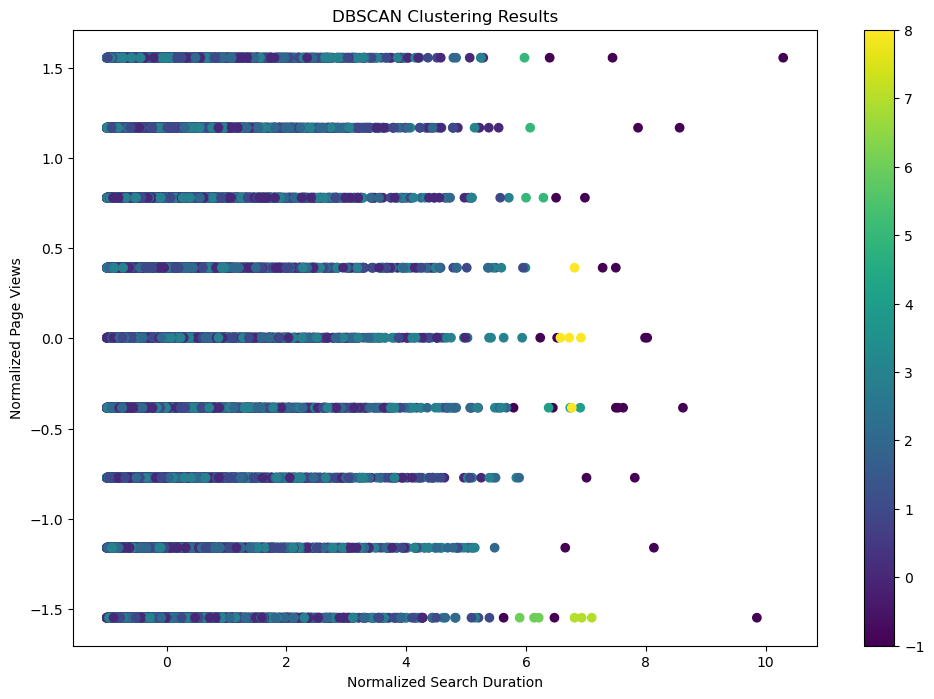

In [13]:
# Plot clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
        X_scaled[:, 0],
        X_scaled[:, 1],
        c=clusters,
        cmap='viridis'
    )
plt.title('DBSCAN Clustering Results')
plt.xlabel('Normalized Search Duration')
plt.ylabel('Normalized Page Views')
plt.colorbar(scatter)

In [14]:
# Dictionary of summary statistics
anomaly_stats = {
        'total_ai_sessions': len(ai_sessions),
        'anomalies_detected': sum(ai_sessions['is_anomaly']),
        'anomaly_percentage': (sum(ai_sessions['is_anomaly']) / len(ai_sessions)) * 100,
        'normal_clusters': len(set(clusters)) - (1 if -1 in clusters else 0)
    }

In [16]:
# Print summary statistics
print("\nAnomaly Detection Summary:")
print(f"Total AI sessions analyzed: {anomaly_stats['total_ai_sessions']}")
print(f"Anomalies detected: {anomaly_stats['anomalies_detected']}")
print(f"Anomaly percentage: {anomaly_stats['anomaly_percentage']:.2f}%")
print(f"Number of normal clusters: {anomaly_stats['normal_clusters']}")


Anomaly Detection Summary:
Total AI sessions analyzed: 40023
Anomalies detected: 26
Anomaly percentage: 0.06%
Number of normal clusters: 9
